# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [3]:
### 讀取資料
(X_Train, Y_Train), (X_Test, Y_test) = cifar100.load_data(label_mode='fine')

### 資料資訊
print('X_Train:',X_Train.shape)
print('Y_Train:',Y_Train.shape)
print('X_Test:',X_Test.shape)
print('Y_test:',Y_test.shape)

X_Train: (50000, 32, 32, 3)
Y_Train: (50000, 1)
X_Test: (10000, 32, 32, 3)
Y_test: (10000, 1)


In [12]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','#+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

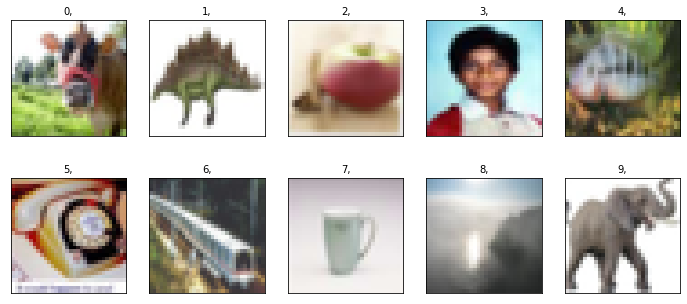

In [13]:
plot_images_labels_prediction(X_Train,Y_Train,[],0)

# Image normalize 

In [4]:
X_Train_Normalize = X_Train.astype('float32')/255
X_Test_Normalize = X_Test.astype('float32')/255

In [7]:
### 已經 Normalize 至 (0~1)
X_Train_Normalize[0][15][15]

array([0.79607844, 0.41960785, 0.45882353], dtype=float32)

# 轉換label 為OneHot Encoding

In [9]:
from keras.utils import np_utils
Y_Train_OneHot = np_utils.to_categorical(Y_Train)
Y_test_OneHot = np_utils.to_categorical(Y_test)

In [11]:
### 已經 One Hot Encoding
Y_Train_OneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)